In [2]:
from sklearn.impute import SimpleImputer

import pandas as pd 
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import sklearn.linear_model

In [ ]:
pip install seaborn

In [ ]:
!pip install pyod  

In [ ]:
pip install flask

# 

# Q1. Problem identification:

This dataset is related to the official Irish homelessness data from 2019 to 2021, which was published by the (Data.Gov.ie). These data have been sourced by the local authorities nationwide and its mainly focus are referred to the number of homelessness people in Ireland who have used accommodation, such as(Supported Temporary, Temporary Emergency and Other Accommodation).These accommodation have been funded and maintained by the housing authorities around the country. Therefore, after have done it  a depth analysis through this dataset, I will be able to extract insight and useful information about the most updated numbers of homelessness cases.








## Feature descriptions

    1.Region: Location where the accommadation are based
    2.Total Adults: Total numbers of adults who have used accommodation
    3.Male Adults: Numbers of males adults who have used accommodation
    4.Female Adults: Numbers females adults who have used accommodation
    5.Adults Aged 18-24: Age group from 18 to 24 who have used accommodation
    6.Adults Aged 25-44: Age group from 25 to 44 who have used accommodation
    7.Adults Aged 45-64: Age group from 45 to 64 who have used accommodation
    8.Adults Aged 65+: Age group from 65 and over who have used accommodation
    9.Number of people who accessed Private Emergency Accommodation
    10.Number of people who accessed Supported Temporary Accommodation
    11.Number of people who accessed Temporary Emergency Accommodation
    12.Number of people who accessed Other Accommodation
    13.Number of Families
    14.Number of Adults in Families
    15.Number of Single-Parent families
    16.Number of Dependants in Families
    17.Month	
    18.Year
    19.Number of Child Dependants in Families


# 

# Q2. Import data¶

In [3]:
data = pd.read_csv("Homeless_Ireland.csv")

In [4]:
data.head()

,Region,Total Adults,Male Adults,Female Adults,Adults Aged 18-24,Adults Aged 25-44,Adults Aged 45-64,Adults Aged 65+,Number of people who accessed Private Emergency Accommodation,Number of people who accessed Supported Temporary Accommodation,Number of people who accessed Temporary Emergency Accommodation,Number of people who accessed Other Accommodation,Number of Families,Number of Adults in Families,Number of Single-Parent families,Number of Dependants in Families,Month,Year,Number of Child Dependants in Families
0,Dublin,4175.0,2724.0,1451.0,485,2397.0,1225.0,68,2372.0,1858.0,33,0,742,1121.0,363.0,1823.0,January,2021,NaN
1,Mid-East,329.0,218.0,111.0,51,172.0,95.0,11,206.0,120.0,3,0,59,81.0,37.0,152.0,January,2021,NaN
2,Midlands,66.0,36.0,30.0,17,30.0,17.0,2,39.0,11.0,16,0,14,15.0,13.0,31.0,January,2021,NaN
3,Mid-West,295.0,200.0,95.0,29,181.0,80.0,5,71.0,190.0,34,0,29,37.0,21.0,45.0,January,2021,NaN
4,North-East,85.0,66.0,19.0,12,43.0,22.0,8,25.0,38.0,22,0,1,2.0,0.0,1.0,January,2021,NaN


In [5]:
data.shape

(288, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 19 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Region                                                           288 non-null    object 
 1   Total Adults                                                     288 non-null    float64
 2   Male Adults                                                      288 non-null    float64
 3   Female Adults                                                    288 non-null    float64
 4   Adults Aged 18-24                                                288 non-null    int64  
 5   Adults Aged 25-44                                                288 non-null    float64
 6   Adults Aged 45-64                                                288 non-null    float64
 7   Adults Aged 65+                             

# 

# Q3. PART (A) Cleaning data

## (a) Check for any duplicates

In [7]:
data.duplicated().any()

False

There are no duplicated values.

## (b) Check for NULL or NaN values

In [8]:
data.isna().sum()

Region                                                               0
Total Adults                                                         0
Male Adults                                                          0
Female Adults                                                        0
Adults Aged 18-24                                                    0
Adults Aged 25-44                                                    0
Adults Aged 45-64                                                    0
Adults Aged 65+                                                      0
Number of people who accessed Private Emergency Accommodation        0
Number of people who accessed Supported Temporary Accommodation      0
Number of people who accessed Temporary Emergency Accommodation      0
Number of people who accessed Other Accommodation                    0
Number of Families                                                   0
Number of Adults in Families                                         0
Number

In [9]:
data.isnull().any()

Region                                                             False
Total Adults                                                       False
Male Adults                                                        False
Female Adults                                                      False
Adults Aged 18-24                                                  False
Adults Aged 25-44                                                  False
Adults Aged 45-64                                                  False
Adults Aged 65+                                                    False
Number of people who accessed Private Emergency Accommodation      False
Number of people who accessed Supported Temporary Accommodation    False
Number of people who accessed Temporary Emergency Accommodation    False
Number of people who accessed Other Accommodation                  False
Number of Families                                                 False
Number of Adults in Families                       

# 

It has been decided to filling out the NaNs values in these columns with the mean values because there are 27 NaNs values related to the column for Number of Single-Parent families and 9 NaNs values related to Number of Dependants in Families. By choosing the filling function, the NaN values in these 2 columns will be changed by the mean values from the data that already exist in the columns


In [10]:

data['Number of Single-Parent families'].fillna(float(data['Number of Single-Parent families'].mean()), inplace=True)
data['Number of Dependants in Families'].fillna(float(data['Number of Dependants in Families'].mean()), inplace=True)

In [11]:
data.isna().sum()

Region                                                               0
Total Adults                                                         0
Male Adults                                                          0
Female Adults                                                        0
Adults Aged 18-24                                                    0
Adults Aged 25-44                                                    0
Adults Aged 45-64                                                    0
Adults Aged 65+                                                      0
Number of people who accessed Private Emergency Accommodation        0
Number of people who accessed Supported Temporary Accommodation      0
Number of people who accessed Temporary Emergency Accommodation      0
Number of people who accessed Other Accommodation                    0
Number of Families                                                   0
Number of Adults in Families                                         0
Number

## 

## (c) Fix any other issue specific for your data

RENAME COLUMN

In [12]:
data1 =pd.DataFrame(data) 

In [13]:
### All of these columns were renamed and shorted due to invalided syntax code from the Dataset.

data1.rename(columns = {'Total Adults': 'Total_Adults', 'Male Adults': 'Male_Adults', 'Female Adults': 'Female_Adults','Adults Aged 18-24': 'Adults_Aged_18-24','Adults Aged 25-44': 'Adults_Aged_25-44', 
                        'Adults Aged 45-64': 'Adults_Aged_45-64', 'Adults Aged 65+': 'Adults_Aged_65_over',
                        'Number of people who accessed Private Emergency Accommodation': 'People who accessed Private Emerg Acc',
                        'Number of people who accessed Supported Temporary Accommodation': 'People who accessed Supported Temp Acc', 
                        'Number of people who accessed Temporary Emergency Accommodation': 'People who accessed Temp Emerg Acc', 
                        'Number of people who accessed Other Accommodation': 'People who accessed Other Acc', 'Number of Families': 'No. of Families',
                        'Number of Adults in Families': 'No. of Adults in Families', 'Number of Single-Parent families': 'No. of Single-Parent families',
                        'Number of Dependants in Families': 'No. of Dependants in Families'}, inplace=True)





DROPPING COLUMN

In [14]:


data1.drop(columns =['Number of Child Dependants in Families'], axis=1, inplace=True)

This column has been dropped because it does have 279 NaNs values and does not have any relevant information to be analysed.

In [15]:
data1.columns

Index(['Region', 'Total_Adults', 'Male_Adults', 'Female_Adults',
       'Adults_Aged_18-24', 'Adults_Aged_25-44', 'Adults_Aged_45-64',
       'Adults_Aged_65_over', 'People who accessed Private Emerg Acc',
       'People who accessed Supported Temp Acc',
       'People who accessed Temp Emerg Acc', 'People who accessed Other Acc',
       'No. of Families', 'No. of Adults in Families',
       'No. of Single-Parent families', 'No. of Dependants in Families',
       'Month', 'Year'],
      dtype='object')

# 

# Q3. Summary statistics and outliers

## (a) Describe the numerical data with summary statistics information

In [16]:
data1.describe()

,Total_Adults,Male_Adults,Female_Adults,Adults_Aged_18-24,Adults_Aged_25-44,Adults_Aged_45-64,Adults_Aged_65_over,People who accessed Private Emerg Acc,People who accessed Supported Temp Acc,People who accessed Temp Emerg Acc,People who accessed Other Acc,No. of Families,No. of Adults in Families,No. of Single-Parent families,No. of Dependants in Families,Year
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,695.715278,433.618056,262.097222,93.031250,399.361111,188.059028,15.263889,364.493056,325.222222,15.100694,1.114583,147.434028,213.496528,85.386973,337.121864,2019.875000
std,1280.238641,787.730308,496.635465,162.376265,748.986164,351.136324,20.951408,685.255638,616.343878,21.005398,2.927235,311.622576,455.102983,168.106590,698.327000,0.781984
min,48.000000,33.000000,14.000000,5.000000,27.000000,10.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2019.000000
25%,109.750000,71.000000,46.000000,21.000000,59.750000,25.000000,5.000000,52.000000,49.750000,0.000000,0.000000,16.000000,21.000000,12.000000,32.000000,2019.000000
50%,286.000000,177.500000,103.000000,40.000000,160.000000,76.500000,9.000000,109.000000,129.500000,4.000000,0.000000,42.000000,57.500000,30.000000,100.500000,2020.000000
75%,350.250000,221.000000,142.000000,56.000000,195.000000,98.000000,13.000000,216.500000,185.000000,25.000000,0.000000,79.000000,106.250000,61.000000,190.250000,2020.250000
max,4600.000000,2875.000000,1884.000000,769.000000,2687.000000,1250.000000,89.000000,2465.000000,2330.000000,195.000000,18.000000,1297.000000,1862.000000,758.000000,2872.000000,2021.000000


The description of the data doesn't show any unusual information. However, all the columns above (except the Year column) seems to have a large difference between the 75% percentile and the max value. It looks like these features are right skewed. We will check that later again once we plot histograms and boxplots to better visualise the data distribution.




# 

## (b) Plot a histograms and/or boxplots for numerical data. Interpret all graphs plotted.

Let's check the data distribution using histograms and box plots.

In [17]:
data2 = pd.DataFrame(data1)

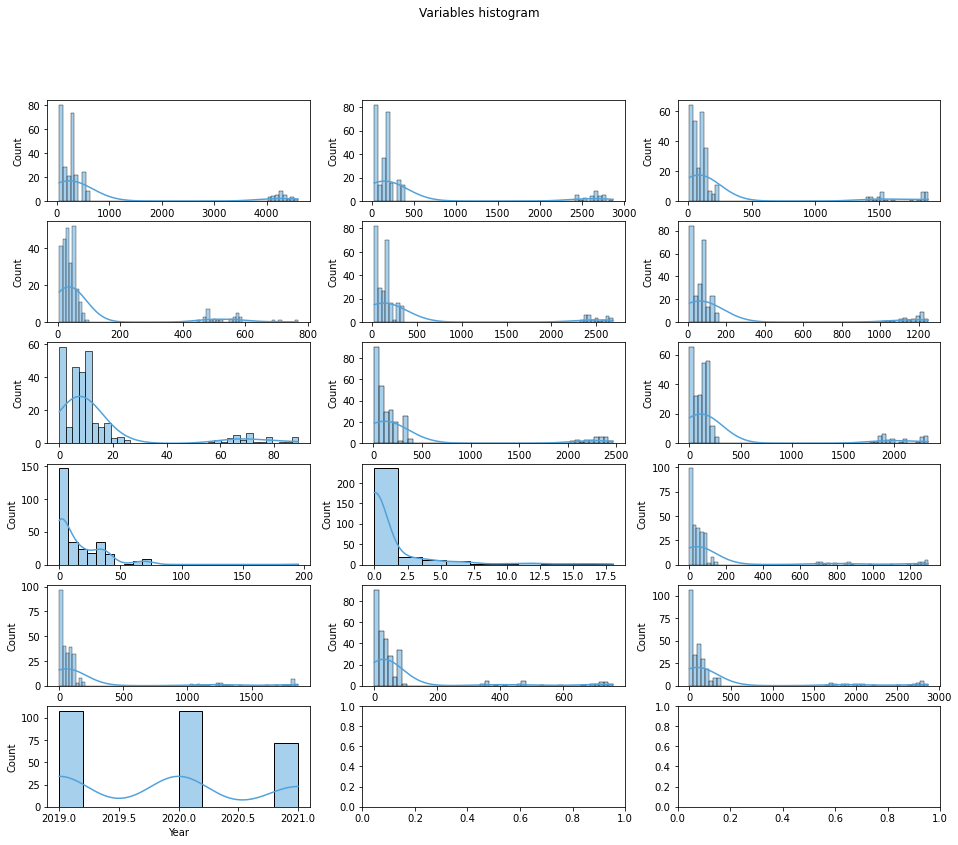

In [18]:
fig, ax = plt.subplots(nrows=6,ncols=3, figsize=(16,13))
plt.suptitle("Variables histogram")
ax=ax.flatten()



plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20


int_cols= data2.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(data2[i], ax=ax[x], kde=True, color='#51A2DB')
    
    



As expected from the data description, the histograms visually show us that the data is skewed.

In [19]:
plt.figure(figsize=(16,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

## 

Total_Adults : float64
Male_Adults : float64
Female_Adults : float64
Adults_Aged_18-24 : int64
Adults_Aged_25-44 : float64
Adults_Aged_45-64 : float64
Adults_Aged_65_over : int64
People who accessed Private Emerg Acc : float64
People who accessed Supported Temp Acc : float64
People who accessed Temp Emerg Acc : int64
People who accessed Other Acc : int64
No. of Families : int64


<Figure size 1440x1080 with 0 Axes>

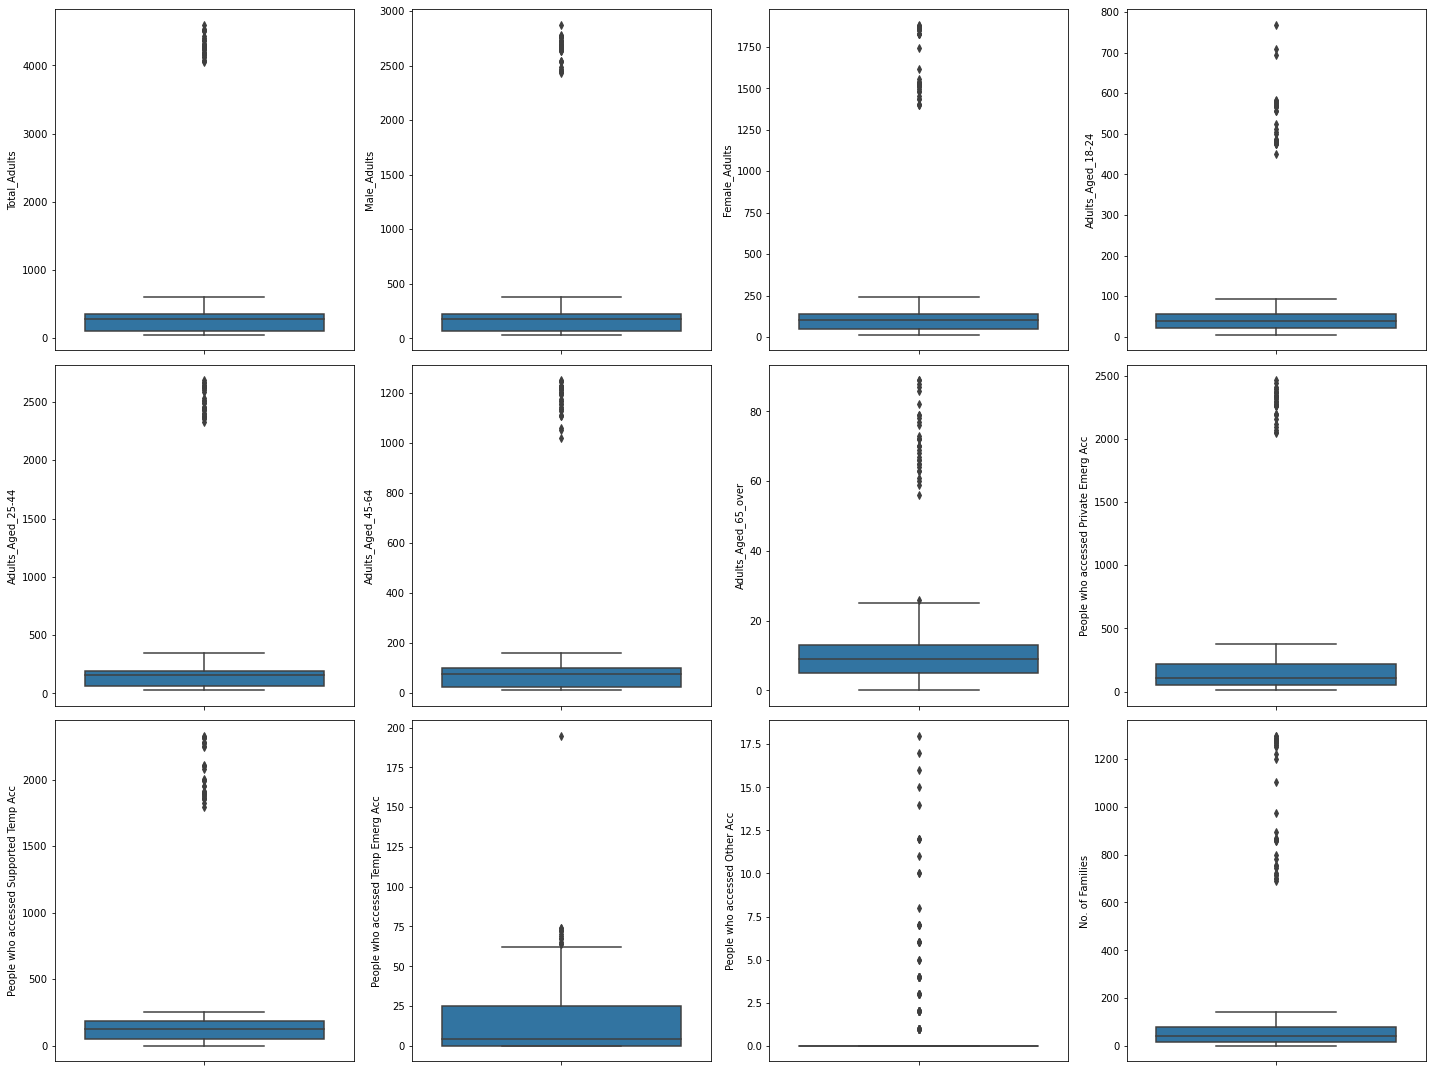

In [20]:
#Inputting the variables into the plot

data_variables = []
for i in data2.columns[0:13].tolist():
        if data2.dtypes[i] == 'int64' or data2.dtypes[i] == 'float64':            
            print(i, ':' , data2.dtypes[i]) 
            data_variables.append(i)
  
    
    
plt.rcParams["figure.figsize"] = [20.00, 15.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

plt.suptitle("Features boxplots")

fig, axes = plt.subplots(3,4) # 3 Rows and 4 columns 

row = 0
column = 0
for i in data_variables:
    
    sns.boxplot(data = data2, y=i, ax=axes[row][column])
    
    column += 1
    if column == 4:
        row += 1
        column = 0            

plt.show() 

As we can see from the boxplots graphs above, all the columns have outliers are above the max value. Some of them have the median in the middle of the box, which means that they are well distributed symmetric. On the other hand, we also have few boxplots with the median closer to the bottom of the box, with a positive skewed form.Furthermore, there are some boxoplots with the median closer to the top of the box and shorter on the upper end of the box, therefore, we can conclude that they have a negatively skewed. 




## 

## (c) Identify and handle outliers



based on theses boxplot analysis, these information belongs to each region and cannot be removed or replaced. Because we do not have enough information about whether there were any problems with the data collection, therefore, the outliers will be kept. The outliers might impact the choice of machine learning algorithm that I will be using later on.  





## 


## (d) Describe the categorical data with bar charts

In [21]:
data3 = data2.sort_values(['Region'], ascending = [True])

In [23]:
data3

,Region,Total_Adults,Male_Adults,Female_Adults,Adults_Aged_18-24,Adults_Aged_25-44,Adults_Aged_45-64,Adults_Aged_65_over,People who accessed Private Emerg Acc,People who accessed Supported Temp Acc,People who accessed Temp Emerg Acc,People who accessed Other Acc,No. of Families,No. of Adults in Families,No. of Single-Parent families,No. of Dependants in Families,Month,Year
0,Dublin,4175.0,2724.0,1451.0,485,2397.0,1225.0,68,2372.0,1858.0,33,0,742,1121.0,363.0,1823.0,January,2021
198,Dublin,4266.0,2652.0,1614.0,475,2514.0,1190.0,87,2335.0,1902.0,42,0,974,1413.0,535.0,2232.0,April,2020
189,Dublin,4515.0,2773.0,1742.0,524,2662.0,1241.0,88,2442.0,2102.0,54,0,1103,1609.0,597.0,2491.0,March,2020
36,Dublin,4304.0,2452.0,1852.0,565,2617.0,1052.0,70,2052.0,2281.0,74,0,1288,1825.0,751.0,2806.0,February,2019
180,Dublin,4600.0,2773.0,1827.0,577,2687.0,1250.0,86,2349.0,2278.0,62,0,1201,1735.0,667.0,2678.0,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,West,314.0,174.0,140.0,46,171.0,87.0,10,169.0,143.0,0,2,72,107.0,37.0,189.0,May,2020
224,West,297.0,165.0,132.0,47,159.0,79.0,12,158.0,139.0,0,0,65,97.0,33.0,170.0,June,2020
233,West,258.0,150.0,108.0,47,122.0,79.0,10,124.0,134.0,0,0,66,99.0,33.0,154.0,June,2021
251,West,282.0,165.0,117.0,49,139.0,84.0,10,142.0,140.0,0,0,59,91.0,27.0,145.0,August,2020


In [24]:
x1 = data3["Region"]
x2 = data3["Month"]
x3 = data3["Year"]

In [25]:
y1= data3["Adults_Aged_18-24"]
y2= data3["Adults_Aged_25-44"]
y3= data3["Adults_Aged_45-64"]
y4= data3["Adults_Aged_65_over"]
y5= data3["People who accessed Private Emerg Acc"]
y6= data3["People who accessed Supported Temp Acc"]
y7= data3["People who accessed Temp Emerg Acc"]


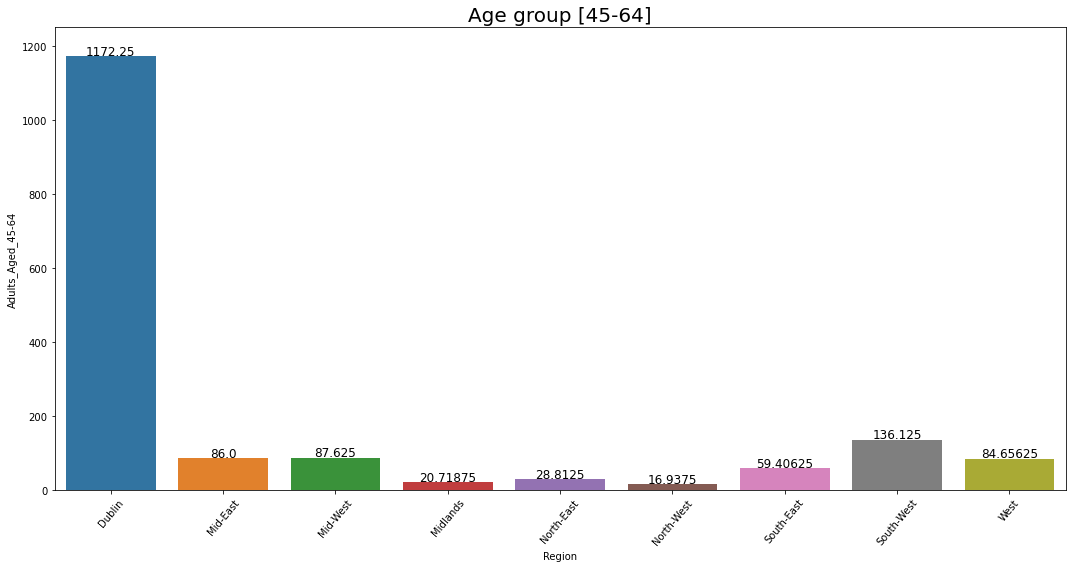

In [26]:

fig,ax = plt.subplots(figsize=(15,8))
plot = sns.barplot(data=data3, x="Region", y="Adults_Aged_45-64", ci=False)

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

plt.title("Age group [45-64]")
plt.xticks(rotation = 50)
plot.set_ylim([0,1250])
for i in plot.patches:
    plt.annotate(i.get_height(),
                (i.get_x() + i.get_width() /2, i.get_height()),
                ha= "center", va="baseline", fontsize=12,
                color="black", xytext=(0,1),
                textcoords="offset points")
    


plt.show()

As we can see from the aged group [45 -64], 1.172 of the majorities people who have used some sort of accommodation between 2019 and 2021 are from Dublin and 136 are from South-West.
West, Mid-West, Mid-East and South-East are quit similiar in term of comparation and it appears that they are not that high compared to Dublin.
However,The Midlands consists of only 20 by following  the North-East with 28.81 and North-West which has the lowest number of people who have used temporary accommodation compared to the others locations. 

## 

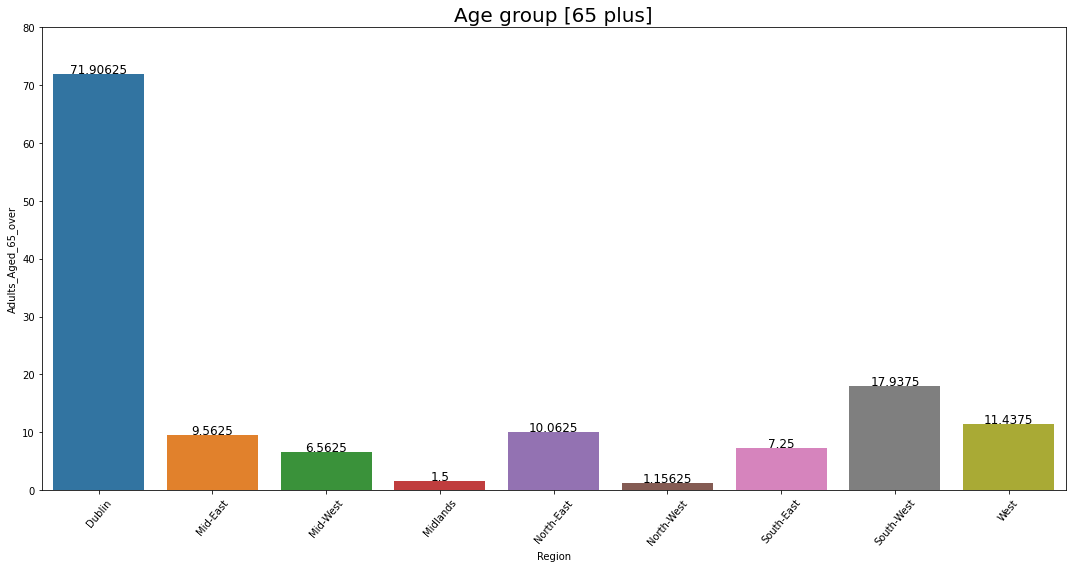

In [27]:
fig,ax = plt.subplots(figsize=(15,8))
plot = sns.barplot(data=data3, x="Region", y="Adults_Aged_65_over", ci=False)

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

plt.title("Age group [65 plus]")
plt.xticks(rotation = 50)
plot.set_ylim([0,80])
for i in plot.patches:
    plt.annotate(i.get_height(),
                (i.get_x() + i.get_width() /2, i.get_height()),
                ha= "center", va="baseline", fontsize=12,
                color="black", xytext=(0,1),
                textcoords="offset points")
    
    
    
    
plt.show()   
    

Conversely, in contrast to the aged group [45-64] who have also used some sort of accommodation between 2019 and 2021, the aged group [65 plus] are also quite high compared to the other aged group. 
As we can see, 71.90 of the majorities people are from Dublin, 18.00 South-West, 11.44 West and 10.1 North-East. The Mid-East has a number of 9.6 people, 6.6 came from the Mid-West and South-East are also slightly higher as well.
The 1.5 are related to Midlands and 1.16 of the people are from North-West who are the lowest in this group. 

## 

## (e) Perform a multivariate analysis

In [28]:
x1 = data3["Region"]
x2 = data3["Month"]
x3 = data3["Year"]


In [29]:
width =0.30

In [30]:
age_group_18_24 = data3["Adults_Aged_18-24"]
age_group_25_44 = data3["Adults_Aged_25-44"]
age_group_45_64 = data3["Adults_Aged_45-64"]
age_group_65_over = data3["Adults_Aged_65_over"]
male_group = data3["Male_Adults"]
female_group = data3["Female_Adults"]
adults_families = data3["No. of Adults in Families"]
dependents_in_families = data3["No. of Dependants in Families"]


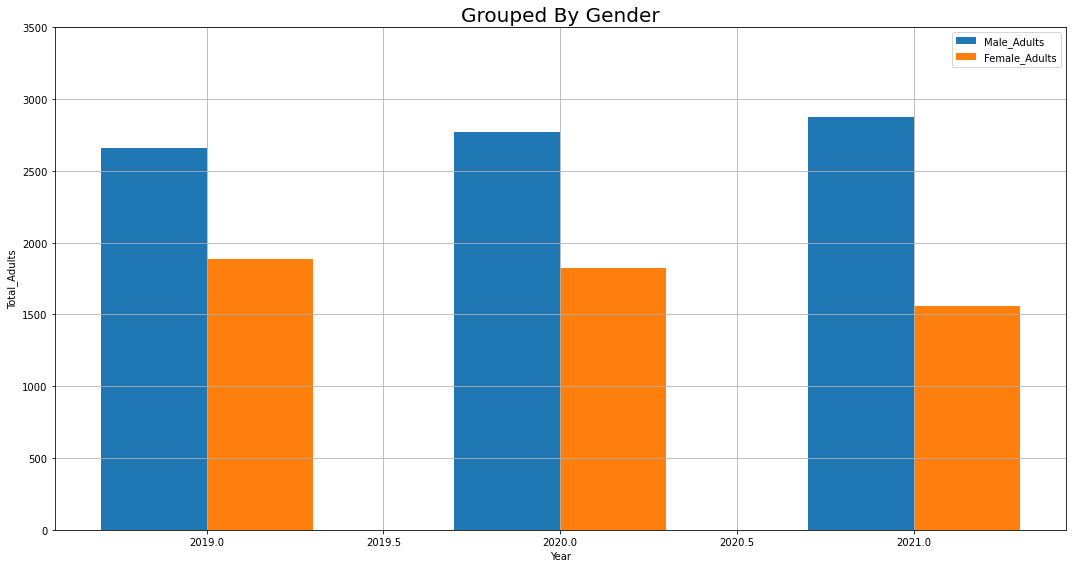

In [31]:
fig,ax = plt.subplots(figsize=(15,8))

group1 = ax.bar(x3 - width/2, male_group, width, label = "Male_Adults")
group2 = ax.bar(x3 + width/2, female_group, width, label = "Female_Adults")

ax.set_title("Grouped By Gender")
ax.set_xlabel("Year")
ax.set_ylabel("Total_Adults")

plt.legend()
plt.grid()
for i in plot.patches:
    plt.annotate(i.get_height(),
                (i.get_x() + i.get_width() /2, i.get_height()),
                ha= "center", va="baseline", fontsize=12,
                color="black", xytext=(0,1),
                textcoords="offset points")
    

ax.set_ylim([0,3500])






plt.show()

We can see clearly from the graph above that, almost 3.000 Male Adults have increased their seeking for a local authority's accommodation in 2021. In constrast, the Female Adults have descreased their seeking for local authorities accommodation compared to the previous years, such as 2019 and 2020.

## 

In [32]:
##Creating a Dataframe

data4 = pd.DataFrame(data3)

In [33]:
##Creating a correlation Matrix code
data4.corr()

,Total_Adults,Male_Adults,Female_Adults,Adults_Aged_18-24,Adults_Aged_25-44,Adults_Aged_45-64,Adults_Aged_65_over,People who accessed Private Emerg Acc,People who accessed Supported Temp Acc,People who accessed Temp Emerg Acc,People who accessed Other Acc,No. of Families,No. of Adults in Families,No. of Single-Parent families,No. of Dependants in Families,Year
Total_Adults,1.000000,0.997976,0.994900,0.989807,0.999579,0.997857,0.976672,0.996342,0.995364,0.578121,-0.134125,0.971411,0.977852,0.914871,0.965217,-0.018955
Male_Adults,0.997976,1.000000,0.986472,0.986605,0.996490,0.998837,0.971827,0.997367,0.989825,0.561331,-0.133576,0.954610,0.962857,0.891787,0.949639,0.006772
Female_Adults,0.994900,0.986472,1.000000,0.986661,0.996172,0.988011,0.976239,0.986435,0.995876,0.599948,-0.133881,0.989988,0.993510,0.943882,0.981906,-0.059605
Adults_Aged_18-24,0.989807,0.986605,0.986661,1.000000,0.987463,0.982842,0.959638,0.983730,0.987956,0.574120,-0.122113,0.963611,0.973574,0.887745,0.949021,-0.015418
Adults_Aged_25-44,0.999579,0.996490,0.996172,0.987463,1.000000,0.996499,0.976818,0.994832,0.996103,0.584115,-0.136327,0.975257,0.980610,0.923242,0.969509,-0.026741
Adults_Aged_45-64,0.997857,0.998837,0.988011,0.982842,0.996499,1.000000,0.973912,0.997463,0.989625,0.564224,-0.132771,0.958649,0.965885,0.901182,0.955312,-0.002498
Adults_Aged_65_over,0.976672,0.971827,0.976239,0.959638,0.976818,0.973912,1.000000,0.976546,0.969947,0.539135,-0.150595,0.959379,0.963107,0.915001,0.955377,-0.040939
People who accessed Private Emerg Acc,0.996342,0.997367,0.986435,0.983730,0.994832,0.997463,0.976546,1.000000,0.984073,0.544949,-0.144681,0.955998,0.963912,0.894266,0.952297,-0.008806
People who accessed Supported Temp Acc,0.995364,0.989825,0.995876,0.987956,0.996103,0.989625,0.969947,0.984073,1.000000,0.590657,-0.122660,0.980481,0.985339,0.930009,0.971692,-0.029358
People who accessed Temp Emerg Acc,0.578121,0.561331,0.599948,0.574120,0.584115,0.564224,0.539135,0.544949,0.590657,1.000000,-0.180162,0.624096,0.618630,0.624299,0.607856,-0.070929


In [34]:

corr_matrix = data4.corr()
print(corr_matrix)

                                        Total_Adults  Male_Adults  \
Total_Adults                                1.000000     0.997976   
Male_Adults                                 0.997976     1.000000   
Female_Adults                               0.994900     0.986472   
Adults_Aged_18-24                           0.989807     0.986605   
Adults_Aged_25-44                           0.999579     0.996490   
Adults_Aged_45-64                           0.997857     0.998837   
Adults_Aged_65_over                         0.976672     0.971827   
People who accessed Private Emerg Acc       0.996342     0.997367   
People who accessed Supported Temp Acc      0.995364     0.989825   
People who accessed Temp Emerg Acc          0.578121     0.561331   
People who accessed Other Acc              -0.134125    -0.133576   
No. of Families                             0.971411     0.954610   
No. of Adults in Families                   0.977852     0.962857   
No. of Single-Parent families     

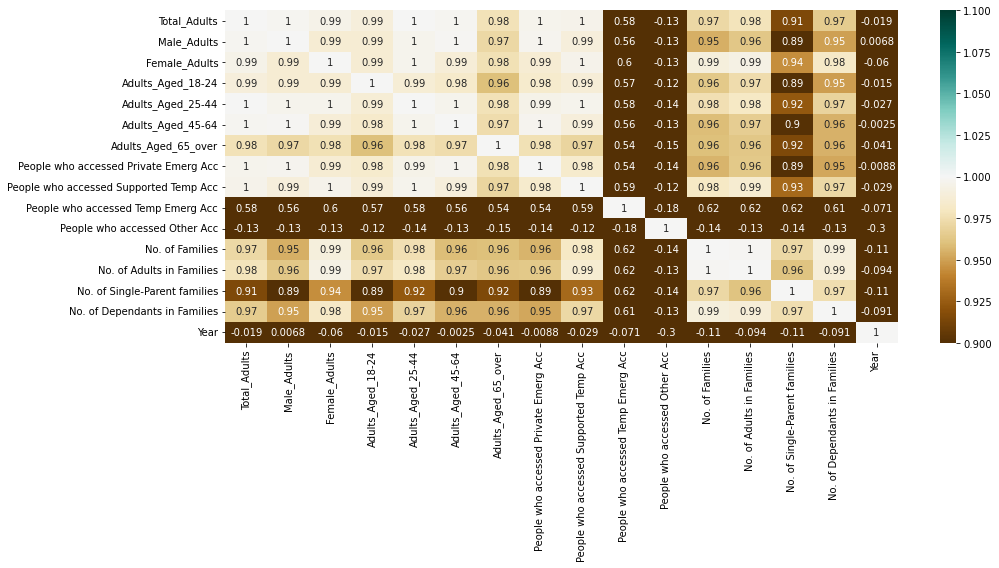

In [35]:
plt.rcParams["figure.figsize"]=(15,8)
sns.heatmap(corr_matrix, annot=True, vmin=1,vmax=1, cmap= "BrBG")

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 10

We can see that based on this correlation matrixes, there are quite few columns with bright colors which appears to have strong correlation between each other. For example, Total Adults column is correlated with most of the columns in this table - if we check, Total Adults have strong correlation with Male Adults and Female Adults have 0.99 percent of correlation with Adults Aged [18-24]. Adults aged[65 plus] also have 0.98 percent correlation with Number of people who Accessed Private Emergency Accommodation.

Conversely, there are also some data that have negative correlation with dark colors and this can be seen from the table above. For example, Number of people who accessed Private Emergency Accommodation have -0.14 negative correlation to Number of people who accessed Other Accommodation. Also, Number of people who accessed Other Accommodation have -0.13 negative correlation with Total Adults.  

## 

# Q4. Data preparation, modelling, and evaluation

## PART (A) 

In this question, I will be analysing the dataset and evaluate a supervised machine learning model that is capable of predicting if the total number of adults have any close correlation with the number of accommodation that have been supported and maintained by the local authorities throughout the country.

## 

# Prepare the data for ML algorithms.


 Based on the previous exploration some columns will be dropped before running the machine learning, (Example: Region, Month and Year).The reasons for dropping these features in this task is as follows: • It does not add any value for the prediction task.



In [36]:
data5 = pd.DataFrame(data4)

In [37]:
data5.drop(columns =['Region', 'Month', 'Year'], axis=1, inplace=True)


In [38]:
data5 

,Total_Adults,Male_Adults,Female_Adults,Adults_Aged_18-24,Adults_Aged_25-44,Adults_Aged_45-64,Adults_Aged_65_over,People who accessed Private Emerg Acc,People who accessed Supported Temp Acc,People who accessed Temp Emerg Acc,People who accessed Other Acc,No. of Families,No. of Adults in Families,No. of Single-Parent families,No. of Dependants in Families
0,4175.0,2724.0,1451.0,485,2397.0,1225.0,68,2372.0,1858.0,33,0,742,1121.0,363.0,1823.0
198,4266.0,2652.0,1614.0,475,2514.0,1190.0,87,2335.0,1902.0,42,0,974,1413.0,535.0,2232.0
189,4515.0,2773.0,1742.0,524,2662.0,1241.0,88,2442.0,2102.0,54,0,1103,1609.0,597.0,2491.0
36,4304.0,2452.0,1852.0,565,2617.0,1052.0,70,2052.0,2281.0,74,0,1288,1825.0,751.0,2806.0
180,4600.0,2773.0,1827.0,577,2687.0,1250.0,86,2349.0,2278.0,62,0,1201,1735.0,667.0,2678.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,314.0,174.0,140.0,46,171.0,87.0,10,169.0,143.0,0,2,72,107.0,37.0,189.0
224,297.0,165.0,132.0,47,159.0,79.0,12,158.0,139.0,0,0,65,97.0,33.0,170.0
233,258.0,150.0,108.0,47,122.0,79.0,10,124.0,134.0,0,0,66,99.0,33.0,154.0
251,282.0,165.0,117.0,49,139.0,84.0,10,142.0,140.0,0,0,59,91.0,27.0,145.0


 Now, I will remove the outliers (values outside 3 standard deviation from the mean in our interpretation of the problem).

## 

In [39]:
from scipy import stats
data5 = data5[(np.abs(stats.zscore(data5)) < 3).all(axis=1)]

In [40]:
data5

,Total_Adults,Male_Adults,Female_Adults,Adults_Aged_18-24,Adults_Aged_25-44,Adults_Aged_45-64,Adults_Aged_65_over,People who accessed Private Emerg Acc,People who accessed Supported Temp Acc,People who accessed Temp Emerg Acc,People who accessed Other Acc,No. of Families,No. of Adults in Families,No. of Single-Parent families,No. of Dependants in Families
0,4175.0,2724.0,1451.0,485,2397.0,1225.0,68,2372.0,1858.0,33,0,742,1121.0,363.0,1823.0
270,4243.0,2749.0,1494.0,487,2458.0,1228.0,70,2396.0,1856.0,37,0,783,1150.0,416.0,1914.0
27,4129.0,2693.0,1436.0,475,2375.0,1213.0,66,2273.0,1952.0,34,0,716,1083.0,349.0,1760.0
54,4087.0,2682.0,1405.0,482,2374.0,1168.0,63,2289.0,1823.0,37,0,699,1047.0,351.0,1719.0
279,4158.0,2681.0,1477.0,482,2402.0,1209.0,65,2360.0,1795.0,37,0,755,1131.0,379.0,1864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,314.0,174.0,140.0,46,171.0,87.0,10,169.0,143.0,0,2,72,107.0,37.0,189.0
224,297.0,165.0,132.0,47,159.0,79.0,12,158.0,139.0,0,0,65,97.0,33.0,170.0
233,258.0,150.0,108.0,47,122.0,79.0,10,124.0,134.0,0,0,66,99.0,33.0,154.0
251,282.0,165.0,117.0,49,139.0,84.0,10,142.0,140.0,0,0,59,91.0,27.0,145.0


In [41]:
data5.shape

(256, 15)

In [42]:
data5.isna().any()

Total_Adults                              False
Male_Adults                               False
Female_Adults                             False
Adults_Aged_18-24                         False
Adults_Aged_25-44                         False
Adults_Aged_45-64                         False
Adults_Aged_65_over                       False
People who accessed Private Emerg Acc     False
People who accessed Supported Temp Acc    False
People who accessed Temp Emerg Acc        False
People who accessed Other Acc             False
No. of Families                           False
No. of Adults in Families                 False
No. of Single-Parent families             False
No. of Dependants in Families             False
dtype: bool

In [43]:
data5.duplicated().any()

True

In [44]:
data5.duplicated().sum()

16

In [45]:
data5.drop_duplicates(inplace=True)

C:\Users\Meire\AppData\Local\Temp\ipykernel_6324\2432494724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5.drop_duplicates(inplace=True)


In [46]:
data5.duplicated().sum()

0

In [47]:
data5.columns

Index(['Total_Adults', 'Male_Adults', 'Female_Adults', 'Adults_Aged_18-24',
       'Adults_Aged_25-44', 'Adults_Aged_45-64', 'Adults_Aged_65_over',
       'People who accessed Private Emerg Acc',
       'People who accessed Supported Temp Acc',
       'People who accessed Temp Emerg Acc', 'People who accessed Other Acc',
       'No. of Families', 'No. of Adults in Families',
       'No. of Single-Parent families', 'No. of Dependants in Families'],
      dtype='object')

<AxesSubplot:>

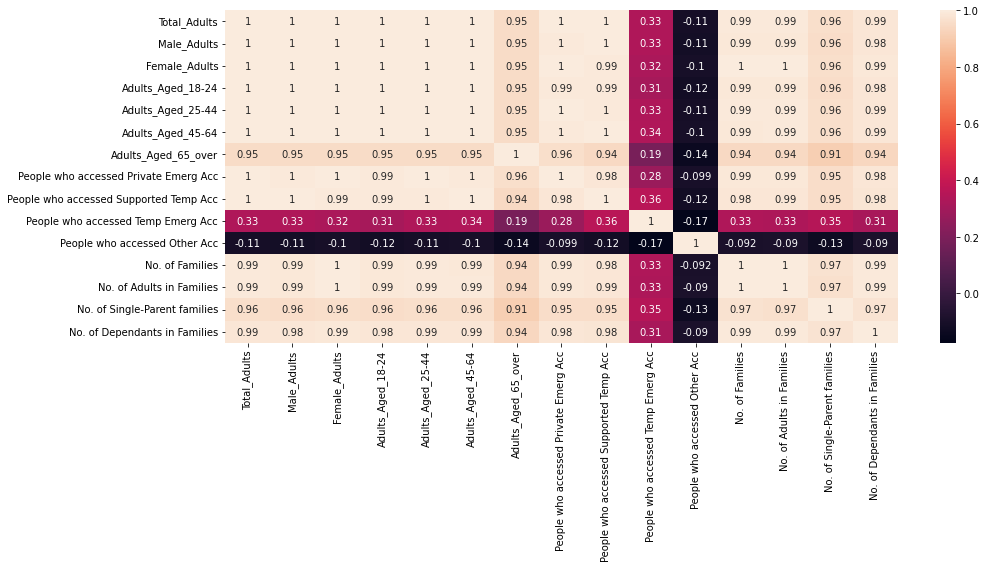

In [48]:
sns.heatmap(data5.corr(), annot=True)





As we can see that after have removed the outliers from the dataset, most of the features are strong correlated, except for ( Number of people who accessed Other Accommodation and Number of people who accessed Temporary Emergency Accommodation).

## 

In [86]:
##importing the functions
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [87]:
features = ['Male_Adults', 'Female_Adults', 'Adults_Aged_18-24',
       'Adults_Aged_25-44', 'Adults_Aged_45-64', 'Adults_Aged_65_over',
       'People who accessed Private Emerg Acc',
       'People who accessed Supported Temp Acc',
       'People who accessed Temp Emerg Acc', 'People who accessed Other Acc',
       'No. of Families', 'No. of Adults in Families',
       'No. of Single-Parent families', 'No. of Dependants in Families']

 Now I will  define the X and Y axis to running the test

In [129]:
x = data5[features].values
x

array([[2724., 1451.,  485., ..., 1121.,  363., 1823.],
       [2749., 1494.,  487., ..., 1150.,  416., 1914.],
       [2693., 1436.,  475., ..., 1083.,  349., 1760.],
       ...,
       [ 150.,  108.,   47., ...,   99.,   33.,  154.],
       [ 165.,  117.,   49., ...,   91.,   27.,  145.],
       [ 146.,  102.,   50., ...,   67.,   17.,   90.]])

In [112]:

y= data5['Total_Adults'].values

y




array([4175., 4243., 4129., 4087., 4158., 4054., 4069., 4204., 4188.,
       4251., 4173.,  327.,  316.,  350.,  324.,  254.,  316.,  329.,
        323.,  294.,  303.,  306.,  303.,  327.,  295.,  305.,  318.,
        310.,  335.,  309.,  335.,  317.,  319.,  280.,  301.,  313.,
        322.,  322.,  283.,  294.,  369.,  289.,  281.,  332.,  291.,
        282.,  343.,  330.,  300.,  283.,  331.,  287.,  291.,  323.,
        341.,  289.,  324.,  291.,  345.,  299.,  293.,  288.,  274.,
        331.,  295.,  286.,  349.,  347.,  341.,  338.,   75.,   72.,
         98.,   91.,  122.,   79.,  111.,   94.,   89.,   97.,   74.,
         95.,  116.,   68.,   97.,   79.,  116.,  109.,   92.,   97.,
         96.,   98.,   92.,   80.,  119.,   66.,   81.,  105.,  107.,
         84.,  178.,  144.,  119.,  126.,  141.,   97.,  182.,  119.,
        187.,   85.,  128.,   89.,  102.,  112.,  110.,  100.,  161.,
        173.,   91.,  176.,  162.,   97.,  169.,   75.,  103.,   95.,
         96.,  129.,

## PART (B) 

## Split the dataset in training set and test set

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


## PART (C)

## Train the model on the training set

In [130]:
# Select a linear model 
from sklearn.linear_model import LinearRegression




In [131]:
model =LinearRegression()

In [132]:
model.fit(x_train,y_train)

LinearRegression()

In [133]:
##Let's check the parameter
c = model.intercept_

c

9.663381206337363e-13

In [121]:
##Let's check the coefficient
m = model.coef_
m

array([ 6.66666667e-01,  6.66666667e-01,  3.33333333e-01,  3.33333333e-01,
        3.33333333e-01,  3.33333333e-01, -1.01030295e-14, -6.10622664e-15,
       -6.47832482e-15,  1.12934022e-14, -9.15933995e-16, -3.80251386e-15,
       -3.46944695e-16, -9.99200722e-16])

In [122]:
pred_train = model.predict(x_train) 
print(pred_train)

[ 288.  252.  291.  349.  318.  237.  218.  348.  369.  350. 4087.  278.
  295.  335.  286.  293.  324.   70.   51.  294.  195.  187.  341.  503.
   74.  287.  178.  511.  103.  116.   96.   84.  218.   75.  289.  324.
  310.  331.  279.  303.   55.  343.  503.  314.   73.  532.  274.  483.
 4129.  299.   69.  324.  332.  550. 4173.   74.  578.  102.  193.  107.
   65.   80.  180.  297.  112. 4175.  119.   66.  338.  283.  300.   79.
  258.   67.  327.   77.   89.  178.   67.  550.  282. 4069.  341.   97.
   97.  337.  197.  592.  502.  504.   98.  501.  327.  176.  119.  313.
  291.  286. 4243.  162.  575.  281.   97.   67.  492.  329.  283.   69.
  323.  188.  504.  179.  301.  335.  495.  110.  181.   81.  317.  608.
  129.  529.  252.  249.  319.  189.   71.  514.   55.  309.  175.   84.
  116.  297.  201.   97.  534.  512.  100.   54.  351.   98.   94.  305.
  201.   95.  350.  256.  282.  294.  552.  345.   70.   92.  358.   75.
  109.  322.  306.  252. 4251.  126.  592.  347.  5

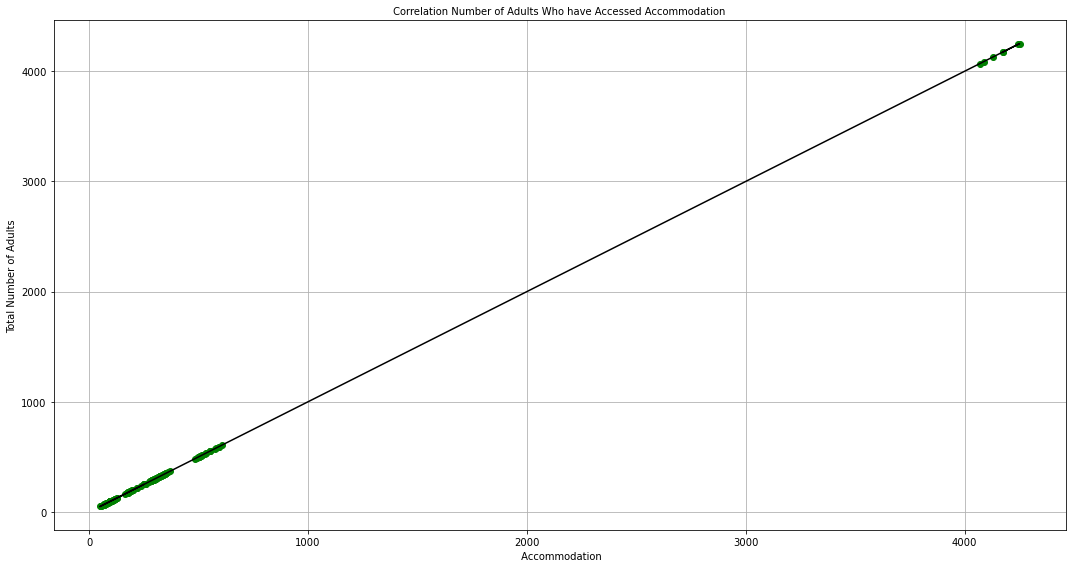

In [123]:
# Visualise the linear regression
plt.scatter(y_train, pred_train,color='g')
plt.plot(y, model.predict(x),color='k')
plt.ylabel("Total Number of Adults")
plt.xlabel(" Accommodation")
plt.title(" Correlation Number of Adults Who have Accessed Accommodation ")
plt.grid()

plt.show()

As we can see from the graph above and the train model, the data appears to have a strong corellation, for example, they are well grouped at bottom and at the top as well. Even though, there is a huge gap as we can see from it. 

In [124]:
from sklearn.metrics import r2_score

In [125]:

r2_score(y_train, pred_train)

1.0

As I have checked by using r2_score to confirm my training prediction, we can see that Y and X have a strong correlation.

## Predict the test set results

In [127]:
pred_test = model.predict(x_test) 
print(pred_test)

[  85.   72.  322.  122.  187.  351.   67.  263.   48.  556.  111.  485.
   68.   55.  323.   74.  532.   89.  341. 4188.  144.  222.   97.  169.
 4054.  303.  511.  105.  316.  169.  289.  291.   84.   95.   74.   91.
   72.  174.  295.   92.   52.  282.  348.  323.  182.  254.  141. 4204.
  128.  248.  331.   83.  343.   50.   81.  280.  361.   61.  161.  173.
   79.  269.   96.  340.  534.   75.  316.  355.   81.   91. 4158.  119.]


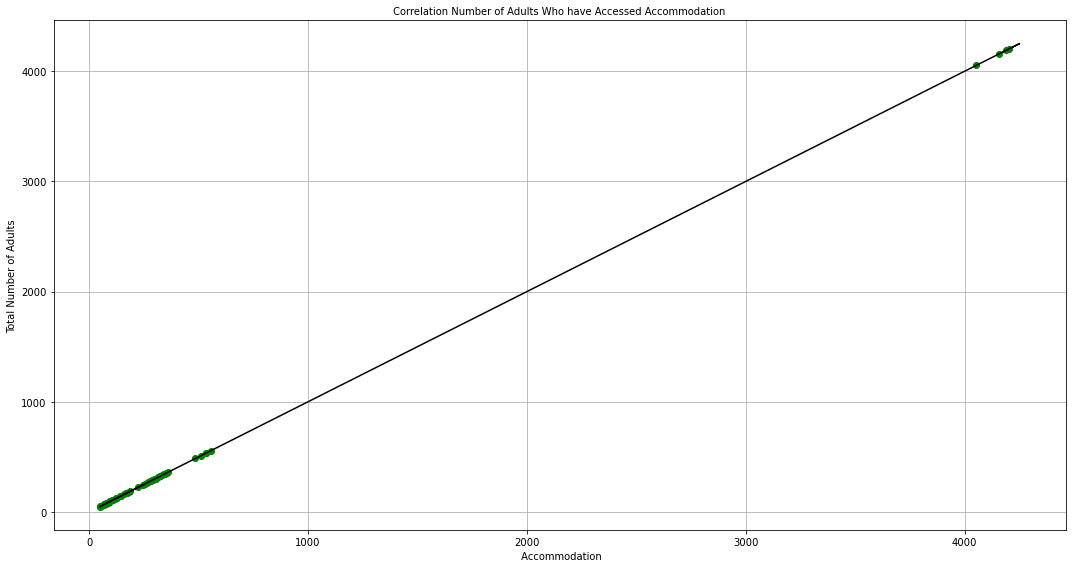

In [128]:
# Visualise the linear regression
plt.scatter(y_test, pred_test,color='g')
plt.plot(y, model.predict(x),color='k')
plt.ylabel("Total Number of Adults")
plt.xlabel(" Accommodation")
plt.title(" Correlation Number of Adults Who have Accessed Accommodation ")
plt.grid()

plt.show()

In [134]:
r2_score(y_test, pred_test)

1.0

## PART (D)

# interpret solution

Also, we can see from the graph above and by using the r2 score, it appears that the dataset that has been used in this predict test model has shown us that there are 1.0 strong correlation between the data. Therefore, as the number homeless people increse there will be also an increase of people accessing (Private Emergency Accommodation and Supported Temporary Accommodation) in multiple location in Ireland. 



## 

# Q5. Data analytics project pipelines 

## (a) Compare and contrast at least three existing data analytics approaches.

The data science field has changed drastically compared to few years ago. Therefore, sometimes IT teams have to deal with  a lot of challenges when they have to work in collaboration framework and apply appropriate data science methodology with small teams based or agile teams in complex projects in a short period of time. Furthermore, companies have to rely on solid data science methodologies approaches to succeed and achieve the desire goal. There are few methodologies approaches which can be used in data science to coordinate different projects while they are being running by the IT teams. These are the following approaches:

Ad Hoc Processes:  

Ad Hoc Processes involve a series of specific implementation which cannot be predefined and sometimes runs one time only when is required. In this process, members must be able to decide what to do  and when to do it. This approach might work well for a small team with simple projects involved. These are the characteristics of Ad Hoc processes:

•	Ad hoc usually have a sense of urgency and unrealistic timeframe for completion,
•	Pressure is a part of ad hoc processes because tend to skip usual processes protocols,
•	 Team members tend to bypass normal controls in ad hoc processes without doing properly due diligence and as a result, they can lose important information during the processes.

•	A single team is more common for this type of process, instead of cross-functional team.
•	This type of approach usually is time-limited, as it is perceived as something quick and the team can be fit in easily.  

The Case Study Approach:

In contrasting to Ad Hoc Processes, the case study approach can also be applied as a framework methodology. A case study approach usually involves qualitative and quantitative methodologies, and it is good for describing, comparing, evaluating and understanding different aspect of a problem. This approach consists of full set of procedures during its processing, which includes few steps, such as: 

Step 1: Defining a case study:
 Consists generally of organisation or behavioural event, and it serves as the main unit of analysis. It does provide a new or unexpected insights in to the subject.
 
Step 2: Designing a case study: 
In the second step, it is important to plan and design how the case study is going to be in place and to make sure that all collected data is relevant. A case study usually consists of a single, multiple experiments or multiple context research. By having multiple experiments and multiple contexts, the results will be stronger and it is required to have a group of different sets of data in order to achieve a final result. On the other hand, a single experiment and a single context might be a solution in some cases, which does not require a lot of work involved.

Step 3: Deciding which type of methodology:
Once determined what type of methodology will be used (ex. qualitative or quantitative research),  then the team must consider what type of case study will be conducted. Determining a specific type of case study design will be assisted by the overall study purpose.

The KDD Process

Another methodology approach that can be applied to business data analysis projects is the Knowledge Discovery in Database (KKD). This is the process of extracting important information from one or multiple data sources. It is used in the preparation and selection of data cleaning, which involves distinct phases for the discovery of interesting patterns during the process. Steps involved in the entire KDD process are as follows:

1.	Selection: 
Identify the goal of the KDD process from the business’s perspective. Determining the specific target data and variables in advance is important during the process.

2.	Pre-processing:
Cleanse and process data (ex. handling missing values and making any alteration throughout the data ) as per the requirement.

3.	Transformation:
Removing unwanted variables and transforming the data into the desired format(ex. changing a categorical variable into a numerical format).

4.	Choose data mining:
This process involves deciding which models and parameters might be appropriate for the overall goal, for example, using graphs charts to visualise trends in the dataset. It is important to make sure that the algorithms provided will be able to discovery hidden patterns during the process.

5.	Interpret or evaluation:
At this phase, once the data has been cleaned, converted into appropriate format, it is essential to document it and evaluate the results found based on relevant attributes, and through visualisation format which can assist to make a better decision.


## 

## (b) Give examples where each approach can be used.

There are many successful examples where Ad Hoc Process, The Case Study approach and The SKK Process have been put in place and organisations where able to make decisions based on the data gathered from researches projects . 
These are the following examples for each methodology:

Ad Hoc Process examples:

Ad Hoc Process can be employed in healthcare sector(ex. to generate a quick report only once regarding blood test or how many people were admitted to ER on specific day. Governmental sectors can also benefit from ad hoc process to make critical decisions that ultimately affect a lot of people.

The Case Study Approach examples:

The case study approach can also be applied in many sectors and different scenarios - for example, investigating the difference in recruitment rates of minority ethnic people in USA, primary care organisations, education and investigating a specific case that has affected an individual or group of people.

The Knowlodge Discovery in Databases (SKK) Process:

The application Knowledge Discovery in Databases (SKK) can also be applied in a variety of business’s projects and it can be an useful methodology in term of assists business to identify and predict consume trends. Furthermore, it is mainly carried in projects related to financial services, electricity providers including, marketing and sales.




## 

## References: 

Bizagi (2022) ‘Understanding Ad Hoc Process’. Available at: https://help.bizagi.com/bpm-suite/en/11.1/index.htm?understanding_ad_hoc_processes.htm

Jack, S.M. and Baxter , P.E. (2010) (PDF) qualitative case study methodology: Study Design and Implementation for Novice Researchers, ResearchGate. Available at: https://www.researchgate.net/publication/228621600_Qualitative_Case_Study_Methodology_Study_Design_and_Implementation_for_Novice_Researchers (Accessed: November 28, 2022).

Krcmar, H. (2010) Knowledge discovery in databases on the example of engineering change ..., ResearchGate. Available at: https://www.researchgate.net/profile/Helmut Krcmar/publication/221338369_Knowledge_Discovery_in_Databases_on_the_Example_of_Engineering_Change_Management/links/56aa20bb08aeaeb4cefae7d5/Knowledge-Discovery-in-Databases-on-the-Example-of-Engineering-Change-Management.pdf (Accessed: November 28, 2022).

Marks, L. (2022) How to deal with ad hoc projects: 5 actionable steps, Runn. Runn. Available at: https://www.runn.io/blog/ad-hoc-projects (Accessed: November 28, 2022).

McCombes, S. (2019) What is a case study? : Definition, Examples & Methods, Scribbr. Available at: https://www.scribbr.com/methodology/case-study/ (Accessed: November 28, 2022).

Technopedia (2017) What is knowledge discovery in databases (KDD)? - Techopedia.com. Available at: https://www.techopedia.com/definition/25827/knowledge-discovery-in-databases-kdd (Accessed: November 28, 2022). 
